# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تشخیص نواحی کلمه</div>

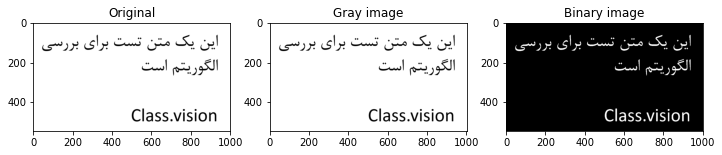

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

input_image = cv2.imread("images/matn.png")            

# convert image to grayscale
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)         

# invert black and white
_, binary_image = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)


plt.figure(figsize=[12,8])
plt.subplot(131);plt.imshow(input_image, cmap='gray');plt.title("Original");

plt.subplot(132);plt.imshow(gray_image, cmap='gray');plt.title("Gray image");
plt.subplot(133);plt.imshow(binary_image, cmap='gray');plt.title("Binary image");

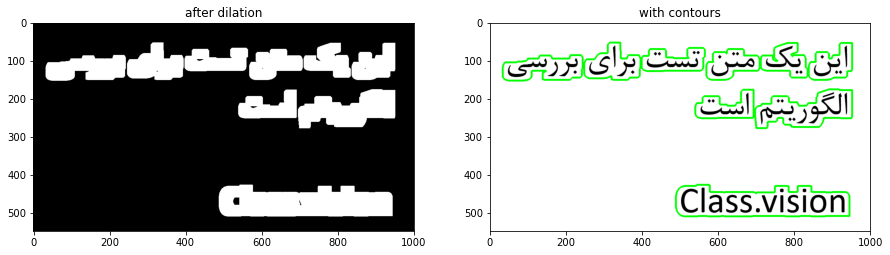

In [15]:
# dilation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(15,10))

dilation = cv2.dilate(binary_image, kernel, iterations = 2)

outputImage = input_image.copy()

contours, hierarchy = cv2.findContours(dilation,        
                                             cv2.RETR_EXTERNAL,                 
                                             cv2.CHAIN_APPROX_SIMPLE)

all_contours = cv2.drawContours(input_image, contours, -1, (0,255,0), 3)

plt.figure(figsize=[15,8])
plt.subplot(121);plt.imshow(dilation, cmap='gray');plt.title("after dilation");
plt.subplot(122);plt.imshow(all_contours, cmap='gray');plt.title("with contours");

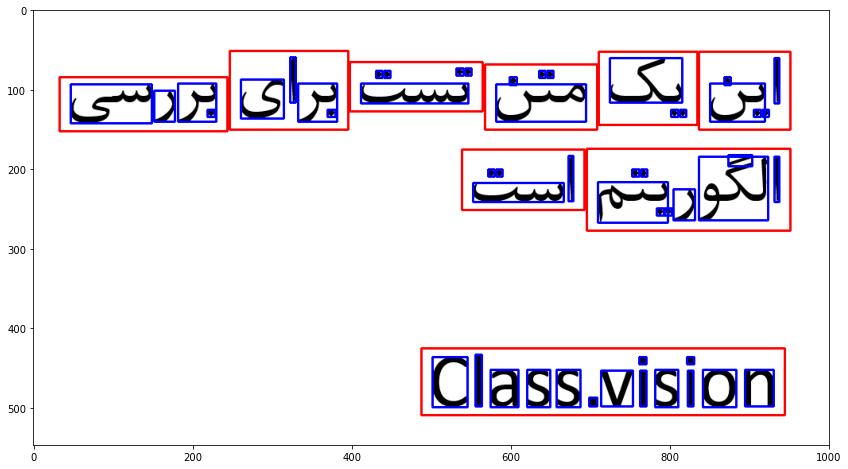

In [16]:
MIN_CONTOUR_AREA = 5


for contour in contours:                         
    if cv2.contourArea(contour) > MIN_CONTOUR_AREA:          

        [intX, intY, intW, intH] = cv2.boundingRect(contour)         

        cv2.rectangle(outputImage,(intX, intY), (intX+intW,intY+intH), (0, 0, 255), 2)                            

        # Get subimage of word and find contours of that word
        imgROI = binary_image[intY:intY+intH, intX:intX+intW]   


        subContours, subHierarchy = cv2.findContours(imgROI.copy(),        
                                             cv2.RETR_EXTERNAL,                 
                                             cv2.CHAIN_APPROX_SIMPLE) 

        # This part is not working as I am expecting
        for subContour in subContours:

            [pointX, pointY, width, height] = cv2.boundingRect(subContour) 


            cv2.rectangle(outputImage,(intX+pointX, intY+pointY),(intX+pointX+width, intY+pointY+height), (255, 0, 0),2)

plt.figure(figsize=[15,8])
plt.imshow(outputImage[...,::-1])